In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from matplotlib.gridspec import GridSpec
import hickle as hkl


from influencer_games.adaptive_dynamics.visualization import Shell
from influencer_games.utils.utilities import *
from influencer_games.domains.simplex.simplex_utlities import *
from influencer_games.domains.resource_distributions import *

## Setup:The enviroment and adapative enviroment

The cell below sets up the outer shell for visualizing the the adapative enviroment. 

In [16]:
domain_bounds=simplex_setup(refinement=3)
corners=domain_bounds[1]
trimesh=domain_bounds[3]

bin_points,bin_points_xy=simplex_bin_setup(domain_bounds=domain_bounds)

In [17]:

resources_dirl=resource_distribution_choice(bin_points=bin_points,resource_type="dirichlet_distribution",resource_parameters=[.2,.2,.2])
resources_guass=resource_distribution_choice(bin_points=bin_points_xy,resource_type="multi_modal_gaussian_distribution_2D_triangle",resource_parameters=[torch.tensor([[[.1,0],[0,.1]],[[.1,0],[0,.1]],[[.1,0],[0,.1]]]),torch.tensor([[0,0],[1,0],[0.5000, 0.8660]])])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


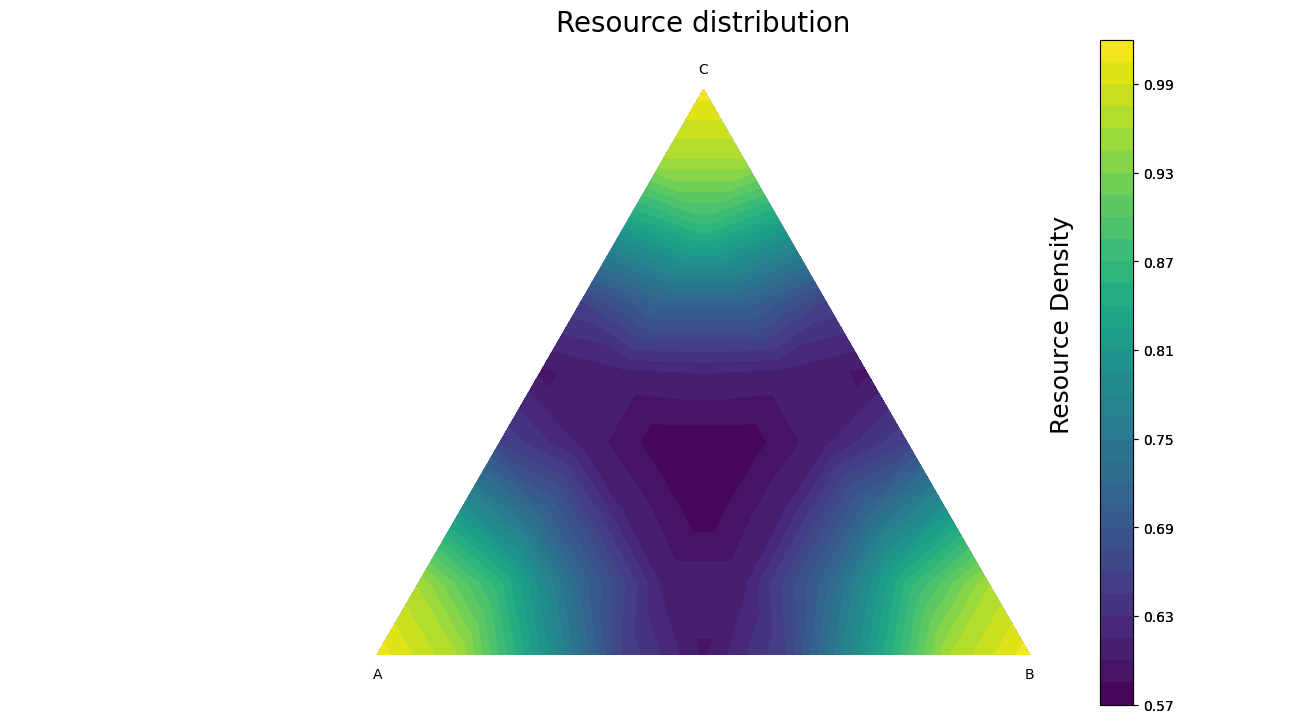

In [18]:
r2=domain_bounds[0]
triangle=domain_bounds[2]

font_size_labels=18
font_size_title=20

fig = plt.figure(figsize=(19, 7))
gs = GridSpec(nrows=1, ncols=1,width_ratios=[1],wspace=0.0, hspace=0.2, top=1, bottom=0.05, left=0.17, right=0.845)
ax0 = fig.add_subplot(gs[:, 0])
ax0.set_box_aspect(1)
ax0.triplot(triangle,linewidth=0.8,color="black")
im=ax0.tricontourf(trimesh, resources_guass,levels=40)
ax0.axis('equal')
ax0.axis('off')
margin=0.01

ax0.set_ylim(ymin=-margin,ymax=r2[1]+margin)
ax0.set_xlim(xmin=-margin,xmax=1.+margin)
ax0.annotate('A',(0,0),xytext=(-0.0,-0.02),horizontalalignment='center',va='top')
ax0.annotate('B',(1,0),xytext=(1.0,-0.02),horizontalalignment='center',va='top')
ax0.annotate('C',corners[2],xytext=corners[2]+np.array([0.0,0.02]),horizontalalignment='center',va='bottom')
plt.title('Resource distribution',fontsize=font_size_title)


ax1 = fig.add_subplot(gs[:, 0])
cbar=fig.colorbar(im,ax=ax1, extend='max',location='right',ticklocation='left')
ax1.yaxis.set_ticks_position('left')
ax1.set_box_aspect(.1)
ax1.axis('off')

ax2 = fig.add_subplot(gs[:, 0])
ax2.axis('off')
ax2.set_box_aspect(.1)
ax2.set_title('Resource Density',x=.82, y=0, rotation = 90,size=font_size_labels)



plt.colorbar(im)
fig.savefig('simplex_alpha_1.svg',bbox_inches='tight')

In [19]:
num_agents=2
int_agents_pos=player_postion_setup(num_agents=num_agents,setup_type="intial_symmetric_setup",domain_type='simplex',domain_bounds=0,dimensions=3)
sig=.2
parameters=torch.tensor([sig,sig,sig,sig,sig,sig,sig,sig])
resource_type="dirichlet_distribution"
resources=resources_guass

infl_configs={"infl_type":"dirl"}
lr_type='cosine' #static or cosine
learning_rate=[1/1000,1/1000,1000]
time_steps=2000
vis=Shell(num_agents=num_agents, agents_pos=int_agents_pos, parameters=parameters,resource_distribution=resources,bin_points=bin_points,infl_configs=infl_configs,lr_type=lr_type,learning_rate=learning_rate,time_steps=time_steps,domain_type="simplex",domain_bounds=domain_bounds,resource_type=resource_type,tolarance=10**-5)


In [20]:
vis.setup_adaptive_env()
vis.field.gradient_accent()

og_pos_matrix=vis.field.pos_matrix.clone()
og_grad_matrix=vis.field.grad_matrix.clone()
vis.agents_pos=int_agents_pos.copy()


broke


## End State plot

Shows the players influence over the resource distribution as they move via adaptive dynamics

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


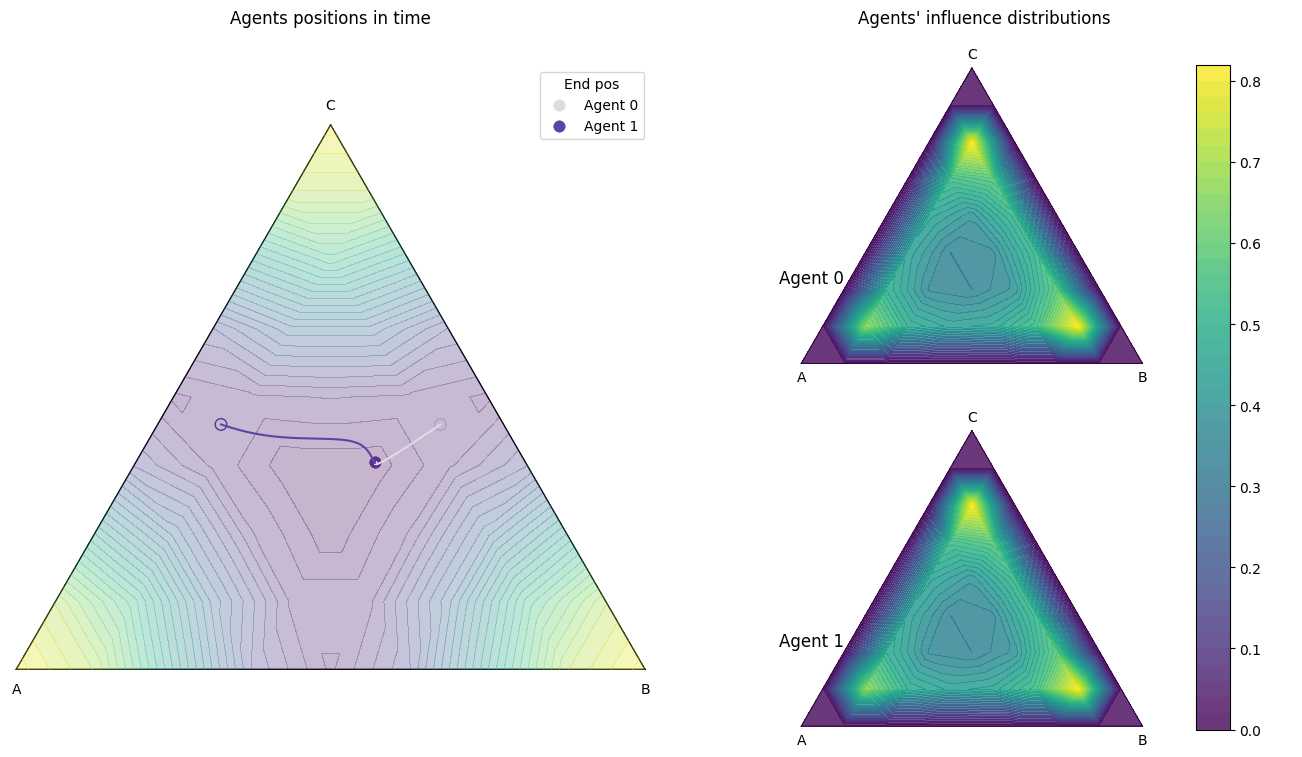

In [7]:
vis.dist_pos_gif(1)

## Gif State plot

gif of the above plot

In [8]:
#vis.dist_pos_gif(100)

In [ ]:
fig=vis.equalibirum_bifurcation_plot(reach_start=.01,reach_end=3,reach_num_points=50,num_interations=2000,intitial_pos=vis.agents_pos.copy())
vis.field.pos_matrix=og_pos_matrix.clone()
vis.field.grad_matrix=og_grad_matrix.clone()
fig

broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke
broke


In [12]:
"""
import pylab as pl
import numpy as np

a = np.array([[.01,3]])
pl.figure(figsize=(9, .5))
img = pl.imshow(a, cmap="rainbow")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
plt.title(r"$\alpha_{\varphi}$ range")
pl.savefig("simplex_colorbar.svg",bbox_inches='tight')

"""

'\nimport pylab as pl\nimport numpy as np\n\na = np.array([[.01,3]])\npl.figure(figsize=(9, .5))\nimg = pl.imshow(a, cmap="rainbow")\npl.gca().set_visible(False)\ncax = pl.axes([0.1, 0.2, 0.8, 0.6])\npl.colorbar(orientation="horizontal", cax=cax)\nplt.title(r"$\x07lpha_{\x0barphi}$ range")\npl.savefig("simplex_colorbar.svg",bbox_inches=\'tight\')\n\n'